In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
#Analyse the first few rows of the dataset
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#Checking the shape of the dataset 
df.shape

#nrows = 48842 and ncols = 15

(48842, 15)

In [5]:
#describe method provides the basic info about the dataset such as max, min value. Standard deviation,
#mean, median etc
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#info method is another useful feature that can be used to check if any missing values are present
# in our feature columns. It also gives the data types of our feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#Check the percentage and number of missing values in feature columns

for i in df.columns:
    non_value = df[i].isin(['?']).sum()
    if non_value > 0:
        print(i)
        print('{}'.format(float(non_value) / (df[i].shape[0]) * 100))
        print('\n')

workclass
5.7307235575938735


occupation
5.751197739650301


native-country
1.7546374022357807




As the percentage of '?' appearing in the three features is less we can safely remove the rows contaning '?'

In [8]:
#selecting all the rows without the '?' sign.
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

In [9]:
# This 'fnlwgt' feature does'nt seem to make any sense and also the mean value of this feature is too high we can
#remove it
df = df.drop('fnlwgt', axis=1)

As can be observed from the above heatmap the correlation among the features does'nt seem to be strong.
Hence we cannot reduce the number of features by droping few.
We need to try other methods of feture selections

The above countplot looks interesting......
1. It shows that the number of people earning less than 50K high school grads are in greater number as compared to people with other qualifications.

2. Also when it comes to people earning more tham 50K, people having bachelors degree are in greater number as compared to other qualified people.

3. But overall large number of people earn less than 50K and comparitively small number of people earn more than 50K.

ValueError: RGBA sequence should have length 3 or 4

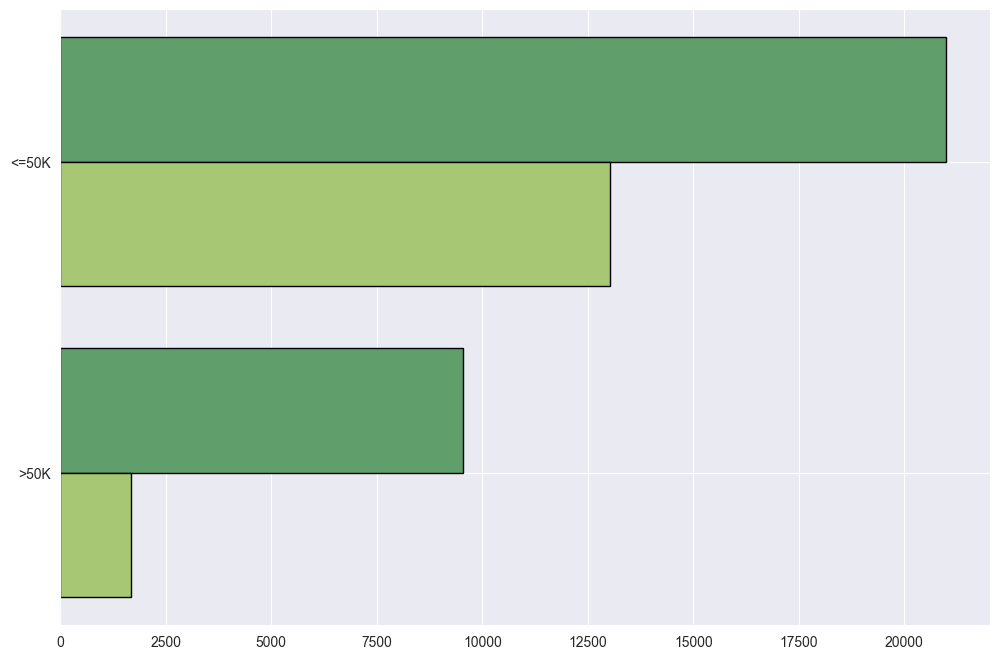

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(y = df['income'], hue = df['gender'], palette = 'summer', edgecolor = [(0,0,0), (0,0,0)])
plt.show()

The above plot shows number of people earning more or less than 50K based on gender.
1. When it comes to earning less than 50K males dominates as compared to female counterparts.
2. When it comes to earning more than 50K also males dominates as compared to female counterparts.

The reason that in both the categories male dominates over females can be the education. Lets see if that is the case in the next plots.

In [ ]:
print("The number of men with each qualification")
print(df[df['gender'] == 'Male']['education'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x = df[df['gender'] == 'Male']['education'].value_counts().values, y = df[df['gender'] == 'Male']['education'].value_counts().index, data = df)
plt.show()

The number of men with each qualification
education
HS-grad         10122
Some-college     6185
Bachelors        5240
Masters          1711
Assoc-voc        1284
11th             1063
Assoc-acdm        922
10th              832
Prof-school       661
7th-8th           626
9th               489
Doctorate         436
12th              398
5th-6th           340
1st-4th           166
Preschool          52
Name: count, dtype: int64


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 45222 and the vector passed to `x` has length 16.

<Figure size 1200x800 with 0 Axes>

The above information shows the number of males having different qualifications.
Also the plot shows that, the number of male High school grads are highest followed by college grads, Bachelors and Masters.

In [12]:
("The number of women with each qualification")
print(df[df['gender'] == 'Female']['education'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x = df[df['gender'] == 'Female']['education'].value_counts().values, y = df[df['gender'] == 'Female']['education'].value_counts().index, data = df)
plt.show()

HS-grad         4661
Some-college    3714
Bachelors       2330
Masters          803
Assoc-voc        675
Assoc-acdm       585
11th             556
10th             391
7th-8th          197
9th              187
12th             179
Prof-school      124
5th-6th          109
Doctorate        108
1st-4th           56
Preschool         20
Name: education, dtype: int64


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 45222 and the vector passed to `x` has length 16.

<Figure size 1200x800 with 0 Axes>

The above information shows the number of females having different qualifications.
Also the plot shows that, the number of female High school grads are highest followed by college grads, Bachelors and Masters.
So , the same trend is followed for both males and females.

But we have to find out why males dominates over females in both categories of earning >50K and <50K.

From the above two plots we can see that the number of people earning less than 50K are High school grads. Also when we see the value counts of High school grads, male = 10122 and female = 4661. Clearly there are more number of male high school grads than female hence greater number of male earn less than 50K than female.

Similar, explanation can be given when it comes to earning more than 50K. Again male dominates over female. This is because, there are more number of males having bachelors degree than female. Hence larger number of men earn more than 50K than women.


The above plot concludes that majority of husbands earn more than 50K than other members.

Another interesting plot.....
The above plot shows the income with respect to occupation.

1. The people involved in occupation such as other service, craft repair, Adm clerical are majority in numbers earning less than 50K.
2. A somewhat sad fact that can be interpreted from the above plot is that, people having Armed forces as occupation earn very less as compared to all the other occupations.
3. But when it comes to people earning greater than 50K than occupation like Prof Speciality and Exec manegerial pay more than any other occupation.

In [13]:
#Lets check the unique variables of the feature
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [14]:
#Replace the unwanted variables and distribute the variables into two variables namely 'married' and 'not married'

df['marital-status'] = df['marital-status'].replace(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Divorced',
                                  'Married-spouse-absent', 'Married-AF-spouse'], ['not married', 'married', 'not married',
                                   'not married', 'not married', 'not married', 'married'])

In [15]:
#Lets chech the head again of the dataframe
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,not married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,not married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Lets convert all the catagorical features into dummy variables using get_dummies method.

In [16]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'gender',
                           'native-country'], drop_first=True)

In [17]:
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,>50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,>50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Split the dataframe into features (X) and labels(y)
X = df.drop('income', axis=1)
y = df['income']

In [19]:
y = pd.get_dummies(y, columns=y, drop_first=True)
y = y.iloc[:,-1]
y.shape

(45222,)

**TRAIN TEST SPLIT**

In [ ]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

All the catagorical values are converted into dummy values.

Now we can start studying for FEATURE SELECTION


**FEATURE SELECTION**

Well there are various methods for feature selection such as:

   1. Feature selection with correlation.
   2. Univariate feature selection. (This is what i have used in this kernel)
   3. Recursive feature elimination (RFE)
   4. RFE with cross validation.

You can try any one or all of these to find the optimum model and corresponding parameters of that model and also try to improve the accuracy of the model by varying the feature selection methods.


**UNIVARIATE FEATURE SELECTION**

In univariate feature selection we select the k highest features and negelect the other ones. K is the variable indicating the features with highest impact.


In [ ]:
feature_select = SelectKBest(chi2, k = 8)  #finding the top 8 best features
feature_select.fit(X_train, y_train)

SelectKBest(k=8, score_func=<function chi2 at 0x000001FE3464D580>)

In [ ]:
score_list = feature_select.scores_
top_features = X_train.columns

In [ ]:
uni_features = list(zip(score_list, top_features))
print(sorted(uni_features, reverse=True)[0:8])

[(89731658.62559977, 'capital-gain'), (1426870.7275412083, 'capital-loss'), (9058.663067891663, 'age'), (6418.954742126585, 'hours-per-week'), (3341.9406572228977, 'marital-status_not married'), (2553.2575093758687, 'educational-num'), (1550.5330836394578, 'relationship_Own-child'), (1298.6807139811253, 'occupation_Exec-managerial')]


This gives the top 8 features
We will train the model on these features and find the performance

**1. RANDOM FOREST**

Accuracy is:  0.8416804864566059


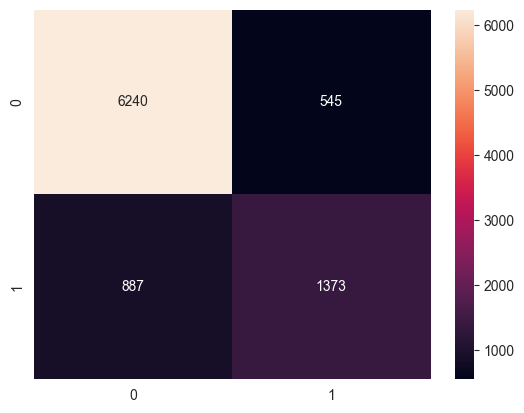

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_1 = feature_select.transform(X_train)
X_test_1 = feature_select.transform(X_test)

#random forest classifier with n_estimators=10 (default)
rf_clf = RandomForestClassifier()      
rf_clf.fit(X_train_1,y_train)

rf_pred = rf_clf.predict(X_test_1)

accu_rf = accuracy_score(y_test, rf_pred)
print('Accuracy is: ',accu_rf)

cm_1 = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_1, annot=True, fmt="d")
plt.show()

We got 84% of accuracy.

Still lot of our predictions seem to be wrong looking at the heatmap. One thing can be done is to change the number of top features and give a trial and error method in order to improve the efficiency.

**2. K NEAREST NEIGHBORS**

Accuracy is:  0.8182421227197346


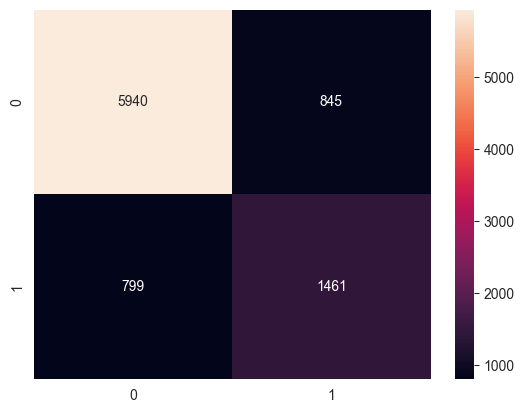

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)


knn_clf = KNeighborsClassifier(n_neighbors=1)      
knn_clf.fit(X_train_2,y_train)

knn_pred = knn_clf.predict(X_test_2)

accu_knn = accuracy_score(y_test, knn_pred)
print('Accuracy is: ',accu_knn)

cm_2 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_2, annot=True, fmt="d")
plt.show()

Accuracy is:  0.8339414040906579


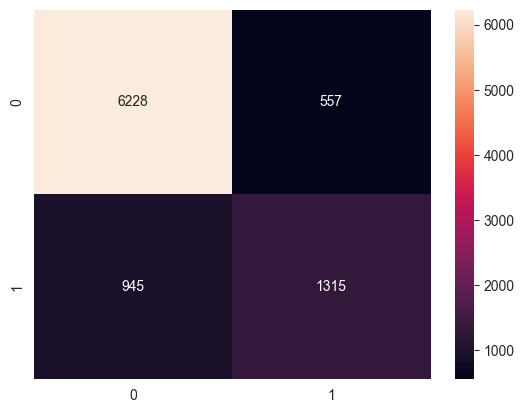

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train_2, y_train)
dt_pred = dt.predict(X_test_2)
acc_dt = accuracy_score(y_test, dt_pred)
print('Accuracy is: ',acc_dt)
cm_4 = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_4, annot=True, fmt="d")
plt.show()


Accuracy is:  0.8593698175787728


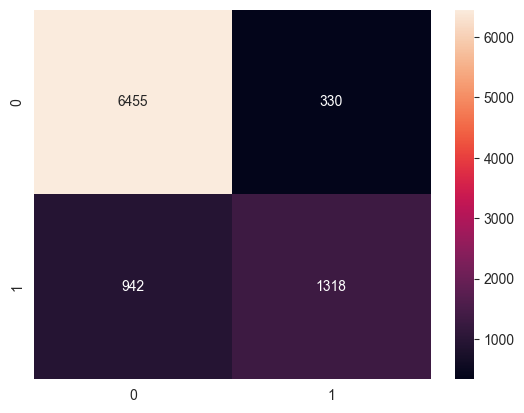

In [ ]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)
gb = GradientBoostingClassifier()
gb.fit(X_train_2, y_train)
gb_pred = gb.predict(X_test_2)
acc_gb = accuracy_score(y_test, gb_pred)
print('Accuracy is: ',acc_gb)
cm_5 = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm_5, annot=True, fmt="d")
plt.show()

Accuracy is:  0.860033167495854


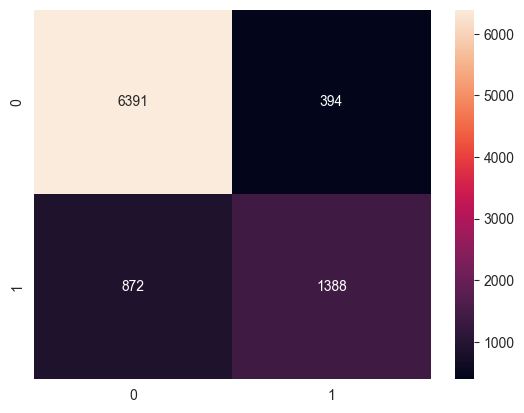

In [ ]:
#xg boost classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X_train_2 = feature_select.transform(X_train)
X_test_2 = feature_select.transform(X_test)
xgb = XGBClassifier()
xgb.fit(X_train_2, y_train)
xgb_pred = xgb.predict(X_test_2)
acc_xgb = accuracy_score(y_test, xgb_pred)
print('Accuracy is: ',acc_xgb)
cm_6 = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_6, annot=True, fmt="d")
plt.show()

C:\Users\saidi\AppData\Local\Temp\ipykernel_33272\3646330197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = classifiers, y = accuracy, palette='viridis')


<Axes: >

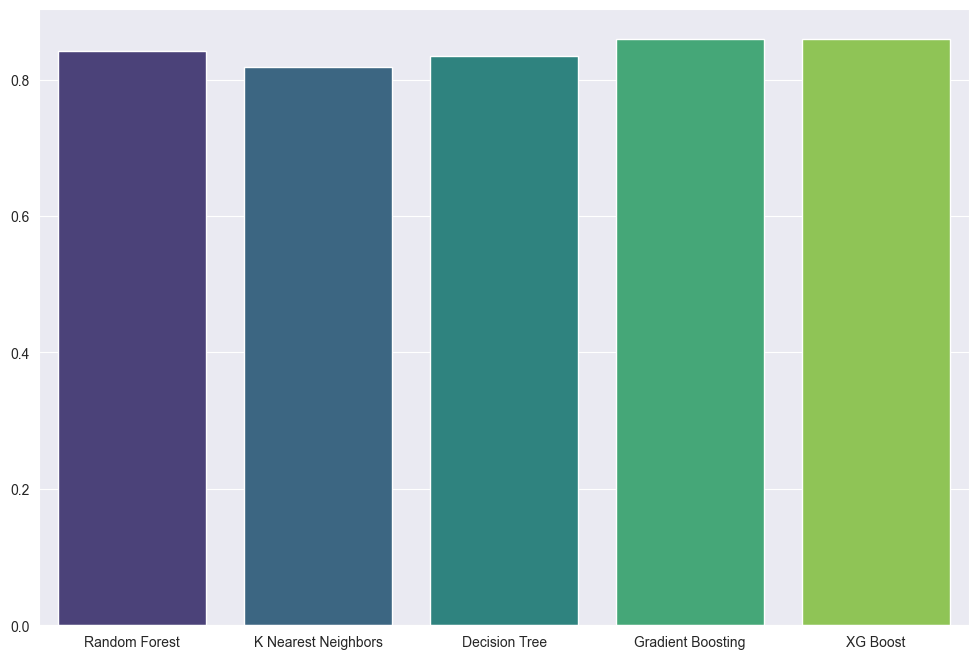

In [ ]:
#accuracy plots of all the classifiers
plt.figure(figsize=(12,8))
classifiers = ['Random Forest', 'K Nearest Neighbors', 'Decision Tree', 'Gradient Boosting', 'XG Boost']
accuracy = [accu_rf, accu_knn, acc_dt, acc_gb, acc_xgb]
sns.barplot(x = classifiers, y = accuracy, palette='viridis')


In [ ]:
#real time 